<a href="https://colab.research.google.com/github/NishaMDev/ML-Learning/blob/main/Assignment%236/ML_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Assignment - 6**

**Created On** March 6, 2022

***@Author : Nisha Devadiga : nishamohan.devadiga@sjsu.edu***

**Problem Statement**-  With the Soccer team information spanning from 2009 to 2019, below classification algorithm can predict whether the Home team will WIN or NOT WIN the match.

For this problem statement, we have identified a new dataset that would serve the purpose and have also added feature selection technique SHAP.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time

In [8]:
#Scraping English Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"

In [9]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
e_data = pd.concat(frames,ignore_index=True)
e_data.head(10)

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   
5  E0  11/08/2018       Watford        Brighton     2     0   H     1     0   
6  E0  11/08/2018        Wolves         Everton     2     2   D     1     1   
7  E0  12/08/2018       Arsenal        Man City     0     2   A     0     1   
8  E0  12/08/2018     Liverpool        West Ham     4     0   H     2     0   
9  E0  12/08/2018   Southampton         Burnley     0     0   D     0     0   

  HTR  ... SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA  
0   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6   D  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7   A  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8   H  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9   D  ... NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 77 columns]

In [10]:
#Scraping Spanish Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/spanish-la-liga/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/spanish-la-liga/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/spanish-la-liga/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/spanish-la-liga/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/spanish-la-liga/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/spanish-la-liga/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/spanish-la-liga/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/spanish-la-liga/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/spanish-la-liga/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/spanish-la-liga/r/9.csv"


In [11]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
sdata = pd.concat(frames,ignore_index=True)
sdata.head(10)

Div        Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  SP1  17/08/2018        Betis     Levante     0     3   A     0     1   A   
1  SP1  17/08/2018       Girona  Valladolid     0     0   D     0     0   D   
2  SP1  18/08/2018    Barcelona      Alaves     3     0   H     0     0   D   
3  SP1  18/08/2018        Celta     Espanol     1     1   D     0     1   A   
4  SP1  18/08/2018   Villarreal    Sociedad     1     2   A     1     1   D   
5  SP1  19/08/2018        Eibar      Huesca     1     2   A     0     2   A   
6  SP1  19/08/2018  Real Madrid      Getafe     2     0   H     1     0   H   
7  SP1  19/08/2018    Vallecano     Sevilla     1     4   A     0     3   A   
8  SP1  20/08/2018   Ath Bilbao     Leganes     2     1   H     1     1   D   
9  SP1  20/08/2018     Valencia  Ath Madrid     1     1   D     0     1   A   

   ...  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 76 columns]

In [12]:
#Scraping Italian Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/italian-serie-a/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/italian-serie-a/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/italian-serie-a/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/italian-serie-a/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/italian-serie-a/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/italian-serie-a/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/italian-serie-a/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/italian-serie-a/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/italian-serie-a/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/italian-serie-a/r/9.csv"


In [13]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
idata = pd.concat(frames,ignore_index=True)
idata.head(10)

Div        Date  HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...  \
0  I1  18/08/2018    Chievo   Juventus     2     3   A   1.0   1.0   D  ...   
1  I1  18/08/2018     Lazio     Napoli     1     2   A   1.0   1.0   D  ...   
2  I1  19/08/2018   Bologna       Spal     0     1   A   0.0   0.0   D  ...   
3  I1  19/08/2018    Empoli   Cagliari     2     0   H   1.0   0.0   H  ...   
4  I1  19/08/2018     Parma    Udinese     2     2   D   1.0   0.0   H  ...   
5  I1  19/08/2018  Sassuolo      Inter     1     0   H   1.0   0.0   H  ...   
6  I1  19/08/2018    Torino       Roma     0     1   A   0.0   0.0   D  ...   
7  I1  20/08/2018  Atalanta  Frosinone     4     0   H   1.0   0.0   H  ...   
8  I1  25/08/2018  Juventus      Lazio     2     0   H   1.0   0.0   H  ...   
9  I1  25/08/2018    Napoli      Milan     3     2   H   0.0   1.0   A  ...   

   SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 76 columns]

In [14]:
#Scraping German Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/german-bundesliga/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/german-bundesliga/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/german-bundesliga/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/german-bundesliga/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/german-bundesliga/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/german-bundesliga/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/german-bundesliga/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/german-bundesliga/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/german-bundesliga/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/german-bundesliga/r/9.csv"


In [15]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
gdata = pd.concat(frames,ignore_index=True)
gdata.head(10)

Div        Date            HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0  D1  24/08/2018       Bayern Munich     Hoffenheim     3     1   H     1   
1  D1  25/08/2018  Fortuna Dusseldorf       Augsburg     1     2   A     1   
2  D1  25/08/2018            Freiburg  Ein Frankfurt     0     2   A     0   
3  D1  25/08/2018              Hertha       Nurnberg     1     0   H     1   
4  D1  25/08/2018          M'gladbach     Leverkusen     2     0   H     0   
5  D1  25/08/2018       Werder Bremen       Hannover     1     1   D     0   
6  D1  25/08/2018           Wolfsburg     Schalke 04     2     1   H     1   
7  D1  26/08/2018            Dortmund     RB Leipzig     4     1   H     3   
8  D1  26/08/2018               Mainz      Stuttgart     1     0   H     0   
9  D1  31/08/2018            Hannover       Dortmund     0     0   D     0   

   HTAG HTR  ...  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA  
0     0   H  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     0   H  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     1   A  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     0   H  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     0   D  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5     0   D  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6     0   H  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7     1   H  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8     0   D  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9     0   D  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 76 columns]

In [16]:
#Scraping French Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/french-ligue-1/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/french-ligue-1/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/french-ligue-1/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/french-ligue-1/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/french-ligue-1/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/french-ligue-1/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/french-ligue-1/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/french-ligue-1/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/french-ligue-1/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/french-ligue-1/r/9.csv"


In [17]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
fdata = pd.concat(frames,ignore_index=True)
fdata.head(10)

Div        Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  F1  10/08/2018    Marseille    Toulouse     4     0   H   1.0   0.0   H   
1  F1  11/08/2018       Angers       Nimes     3     4   A   1.0   1.0   D   
2  F1  11/08/2018        Lille      Rennes     3     1   H   1.0   1.0   D   
3  F1  11/08/2018  Montpellier       Dijon     1     2   A   1.0   0.0   H   
4  F1  11/08/2018       Nantes      Monaco     1     3   A   0.0   0.0   D   
5  F1  11/08/2018         Nice       Reims     0     1   A   0.0   1.0   A   
6  F1  11/08/2018   St Etienne    Guingamp     2     1   H   1.0   0.0   H   
7  F1  12/08/2018     Bordeaux  Strasbourg     0     2   A   0.0   0.0   D   
8  F1  12/08/2018         Lyon      Amiens     2     0   H   1.0   0.0   H   
9  F1  12/08/2018     Paris SG        Caen     3     0   H   2.0   0.0   H   

   ...  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA  
0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 76 columns]

In [18]:
frames = [e_data,sdata,idata,gdata,fdata]
data = pd.concat(frames,ignore_index=True)
data

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0      E0  10/08/2018    Man United       Leicester     2     1   H   1.0   
1      E0  11/08/2018   Bournemouth         Cardiff     2     0   H   1.0   
2      E0  11/08/2018        Fulham  Crystal Palace     0     2   A   0.0   
3      E0  11/08/2018  Huddersfield         Chelsea     0     3   A   0.0   
4      E0  11/08/2018     Newcastle       Tottenham     1     2   A   1.0   
...    ..         ...           ...             ...   ...   ...  ..   ...   
18255  F1  2010-05-15         Nancy    Valenciennes     1     1   D   1.0   
18256  F1  2010-05-15          Nice      St Etienne     1     1   D   1.0   
18257  F1  2010-05-15      Paris SG     Montpellier     1     3   A   0.0   
18258  F1  2010-05-15       Sochaux         Auxerre     1     2   A   0.0   
18259  F1  2010-05-15      Toulouse          Monaco     0     0   D   0.0   

       HTAG HTR  ...   SJA   GBH  GBD   GBA   BSH  BSD   BSA   SBH  SBD   SBA  
0       0.0   H  ...   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  
1       0.0   H  ...   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  
2       1.0   A  ...   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  
3       2.0   A  ...   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  
4       2.0   A  ...   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  
...     ...  ..  ...   ...   ...  ...   ...   ...  ...   ...   ...  ...   ...  
18255   0.0   H  ...  3.00  2.15  3.2  3.20  2.15  3.1  3.30  2.20  3.0  3.20  
18256   0.0   H  ...  3.50  2.15  3.2  3.20  2.25  3.1  3.10  2.10  3.1  3.30  
18257   1.0   A  ...  2.75  2.45  3.1  2.80  2.50  3.1  2.70  2.30  3.1  2.88  
18258   1.0   A  ...  1.73  5.00  3.4  1.67  5.50  3.5  1.62  4.75  3.5  1.65  
18259   0.0   D  ...  4.00  1.87  3.3  4.00  2.00  3.3  3.50  1.90  3.2  3.80  

[18260 rows x 77 columns]

In [19]:
data.index.is_unique

True

Check Shape of the data

In [20]:
data.shape

(18260, 77)

Drop unnecessary Columns which are not important for feature engineering

In [21]:
data.drop(columns= ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee'], inplace= True)

In [22]:
# change column name to remove special keyword.
data = data.rename(columns={"BbMx>2.5":"BbMxGT2.5","BbAv>2.5":"BbAvGT2.5", "BbMx<2.5":"BbMxLT2.5","BbAv<2.5":"BbAvLT2.5" })

Check for missing values

In [23]:
data.describe()

FTHG          FTAG          HTHG          HTAG            HS  \
count  18260.000000  18260.000000  18257.000000  18257.000000  18258.000000   
mean       1.550219      1.160022      0.684012      0.501725     13.992058   
std        1.304358      1.148496      0.830446      0.716273      5.192466   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000     10.000000   
50%        1.000000      1.000000      0.000000      0.000000     13.000000   
75%        2.000000      2.000000      1.000000      1.000000     17.000000   
max       10.000000      9.000000      6.000000      5.000000     43.000000   

                 AS           HST           AST            HF            AF  \
count  18258.000000  18258.000000  18258.000000  18256.000000  18256.000000   
mean      11.202487      5.174389      4.109760     13.550559     13.996056   
std        4.544729      2.804104      2.452864      4.489870      4.597033   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000      3.000000      2.000000     10.000000     11.000000   
50%       11.000000      5.000000      4.000000     13.000000     14.000000   
75%       14.000000      7.000000      6.000000     16.000000     17.000000   
max       39.000000     24.000000     20.000000     38.000000     34.000000   

       ...          SJA          GBH          GBD          GBA          BSH  \
count  ...  9278.000000  7287.000000  7287.000000  7287.000000  7291.000000   
mean   ...     4.695029     2.487482     3.667249     4.416127     2.485456   
std    ...     3.839182     1.514733     0.935291     3.105900     1.517836   
min    ...     1.100000     1.050000     1.450000     1.120000     1.040000   
25%    ...     2.630000     1.700000     3.200000     2.600000     1.670000   
50%    ...     3.600000     2.100000     3.300000     3.500000     2.100000   
75%    ...     5.250000     2.650000     3.750000     5.000000     2.620000   
max    ...    41.000000    21.000000    11.000000    34.000000    17.000000   

               BSD          BSA          SBH          SBD          SBA  
count  7291.000000  7291.000000  5440.000000  5440.000000  5440.000000  
mean      3.670372     4.450171     2.450306     3.615101     4.351630  
std       0.920859     3.274420     1.519704     0.910947     3.131729  
min       1.330000     1.120000     1.030000     2.100000     1.100000  
25%       3.250000     2.620000     1.650000     3.200000     2.600000  
50%       3.400000     3.400000     2.100000     3.300000     3.400000  
75%       3.750000     5.000000     2.600000     3.600000     5.000000  
max      13.000000    34.000000    19.000000    13.000000    34.000000  

[8 rows x 70 columns]

Examine the columns, look at missing data and check Datatype of the Columns

In [24]:
data.shape

(18260, 72)

In [25]:
def impute_median(col):
    return col.fillna('D')

data.HTR = data['HTR'].transform(impute_median)

Check if the Dataset is Balanced

In [26]:
data["FTR"].value_counts()

H    8428
A    5204
D    4628
Name: FTR, dtype: int64

We can see the Data set is not perfectly balanced at it leans towards the “Home” a bit more.

**Latent Variable# 1**

The Total Shots Ratio (TSR) is used to determine how well teams fare in a match when it comes to taking and conceding shots.

The TSR is determined by the following formula:

TSR = $\frac{Total shots for}{Total shots for + total shots against}$


In [27]:
data["TSR"] = data["HS"] / (data["HS"] + data["AS"])


**Latent Variable# 2**

Home Hit Rate is used to determines the rate at which home teams serves a goal against shots played.

The HHR is determined by the following formula:

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [28]:
data["HHR"] = data["FTHG"]/data["HS"]

**Latent Variable# 3**

Away Hit Rate is used to determine the rate at which away teams serves a goal against shots played.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [29]:
data["AHR"] = data["FTAG"]/data["AS"]

In [30]:
data.drop(columns=["HS","AS"], inplace=True)
data

FTHG  FTAG FTR  HTHG  HTAG HTR  HST  AST    HF    AF  ...   GBA   BSH  \
0         2     1   H   1.0   0.0   H  6.0  4.0  11.0   8.0  ...   NaN   NaN   
1         2     0   H   1.0   0.0   H  4.0  1.0  11.0   9.0  ...   NaN   NaN   
2         0     2   A   0.0   1.0   A  6.0  9.0   9.0  11.0  ...   NaN   NaN   
3         0     3   A   0.0   2.0   A  1.0  4.0   9.0   8.0  ...   NaN   NaN   
4         1     2   A   1.0   2.0   A  2.0  5.0  11.0  12.0  ...   NaN   NaN   
...     ...   ...  ..   ...   ...  ..  ...  ...   ...   ...  ...   ...   ...   
18255     1     1   D   1.0   0.0   H  6.0  4.0  14.0  20.0  ...  3.20  2.15   
18256     1     1   D   1.0   0.0   H  1.0  5.0  18.0  22.0  ...  3.20  2.25   
18257     1     3   A   0.0   1.0   A  1.0  5.0  18.0  18.0  ...  2.80  2.50   
18258     1     2   A   0.0   1.0   A  8.0  7.0  15.0   5.0  ...  1.67  5.50   
18259     0     0   D   0.0   0.0   D  3.0  1.0  24.0  18.0  ...  4.00  2.00   

       BSD   BSA   SBH  SBD   SBA       TSR       HHR       AHR  
0      NaN   NaN   NaN  NaN   NaN  0.380952  0.250000  0.076923  
1      NaN   NaN   NaN  NaN   NaN  0.545455  0.166667  0.000000  
2      NaN   NaN   NaN  NaN   NaN  0.600000  0.000000  0.200000  
3      NaN   NaN   NaN  NaN   NaN  0.315789  0.000000  0.230769  
4      NaN   NaN   NaN  NaN   NaN  0.500000  0.066667  0.133333  
...    ...   ...   ...  ...   ...       ...       ...       ...  
18255  3.1  3.30  2.20  3.0  3.20  0.575758  0.052632  0.071429  
18256  3.1  3.10  2.10  3.1  3.30  0.263158  0.200000  0.071429  
18257  3.1  2.70  2.30  3.1  2.88  0.409091  0.111111  0.230769  
18258  3.5  1.62  4.75  3.5  1.65  0.588235  0.050000  0.142857  
18259  3.3  3.50  1.90  3.2  3.80  0.678571  0.000000  0.000000  

[18260 rows x 73 columns]

In [31]:
data.columns

Index(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMxGT2.5', 'BbAvGT2.5', 'BbMxLT2.5',
       'BbAvLT2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'LBH', 'LBD', 'LBA', 'SJH', 'SJD',
       'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'SBH', 'SBD', 'SBA',
       'TSR', 'HHR', 'AHR'],
      dtype='object')

Based on our understanding on football, we will consider following features for the datamining task. Below univariate and bivariate analysis shows why certain features are important. We will use SHAP feature selection technique as well to justify the feature selection.

# **Univariate Analysis**

In [32]:
df_for_anan = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR","TSR", "HHR","AHR"]]


Count FTR (*Full Time Result*) for each outcome.

Text(0, 0.5, 'Count')

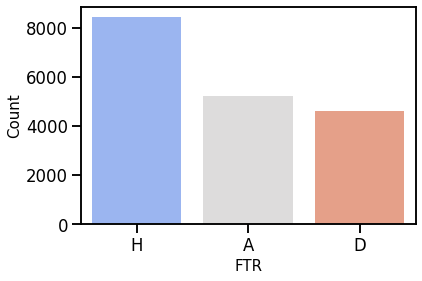

In [33]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=df_for_anan,x="FTR",palette="coolwarm",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observations:**

1. Just By looking at the Counts we can get the Understanding that the Home team has Significantly more wins.
2. Another way of looking at is Away Team is more likely to get a Draw or a loss more often
3. Looking at this it looks like Playing at home is a big advantage.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

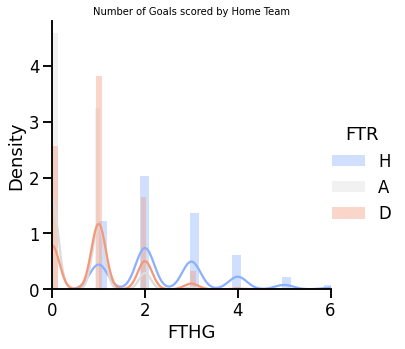

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

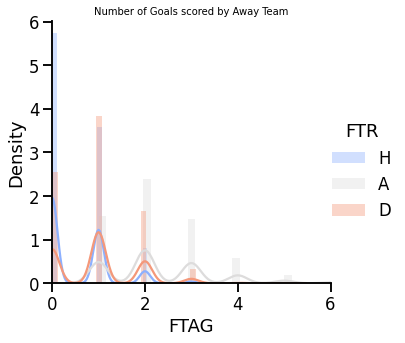

In [34]:
sns.FacetGrid(df_for_anan,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTHG") \
   .add_legend()
plt.title("Number of Goals scored by Home Team",size=10,color= "Black")
plt.show()

sns.FacetGrid(df_for_anan,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTAG") \
   .add_legend()
plt.title("Number of Goals scored by Away Team",size=10,color= "Black")
plt.show()

**Observations:**

1. Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence).Away team slightly ahead here.
2. However, When it come to more than 2 goals, Home Teams are ahead.

**Probability Density Function(PDF)**

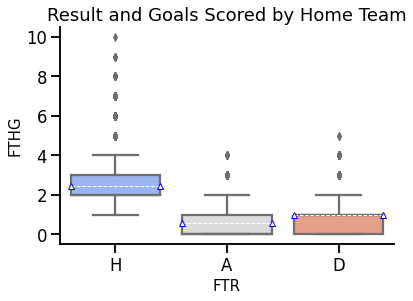

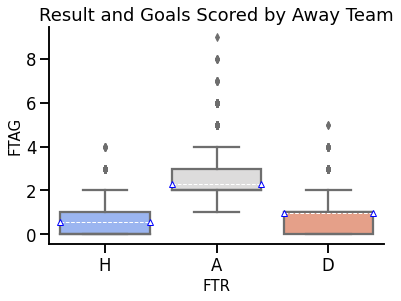

In [35]:
sns.boxplot(data=df_for_anan,x="FTR",y="FTHG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=df_for_anan,x="FTR",y="FTAG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

***Observations:***

**Home Team :**
1. While winning score mean of 2.5 Goals.
2. When Drawn mean is 0.9 Goals
3. When Lost Mean is 0.5 Goals

**Away Team :**

1. 1.While winning score mean of 2.1 Goals.
2. 2.When Drawn mean is 0.9 Goals.
3. When Lost Mean is 0.6 Goals
-> Overall Home Team is Scoring more goals, While will be a huge factor in winning the game.

# **Bi-Variate analysis**

Perform Pair Plot analysis to visualize the relationship between features.

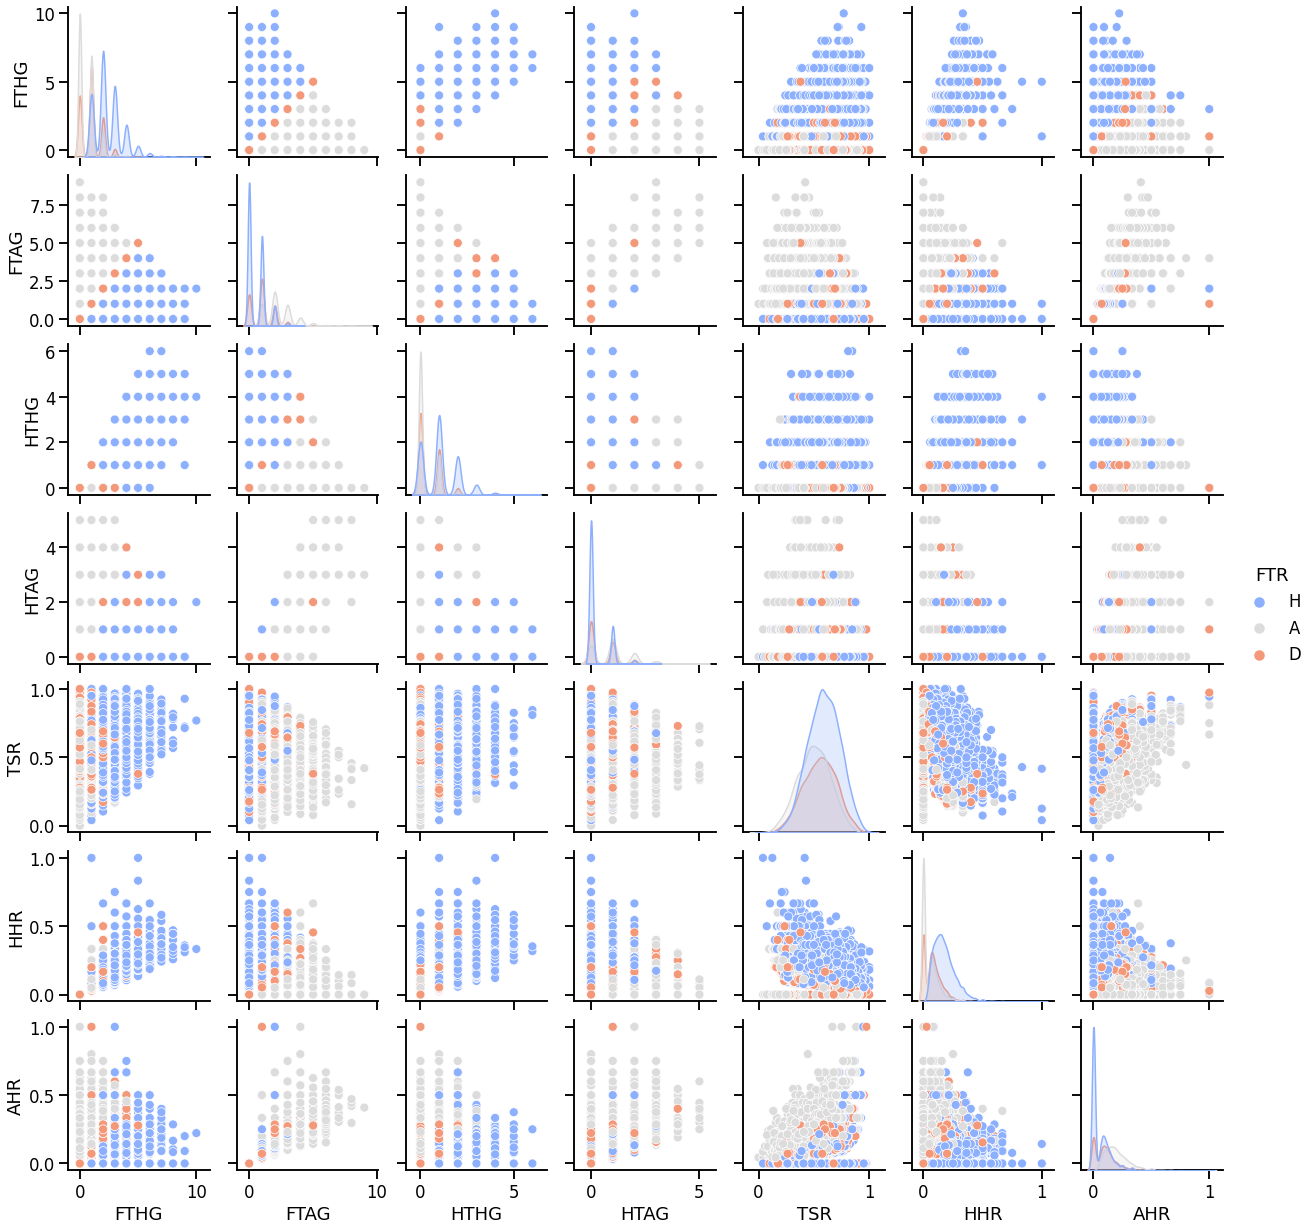

In [36]:
#sns.pairplot(df_for_anan,hue="FTR",palette="coolwarm")

**Observations:**

FTHG *(Full time Home Goal)* and FTAG *(Full time Away Goal)* are the values which clearly indicate who will win. 
So studying these 2 variables can be the best way to to predict FTR.

Whichever faeture has higher value that team wins which translates to the team which score more Goals at Full Time wins the match.

Basicall this is how football works.

Lets Visualize to check if a team is Winning at Half Time or does it Change at Full Time

Text(0, 0.5, 'Count')

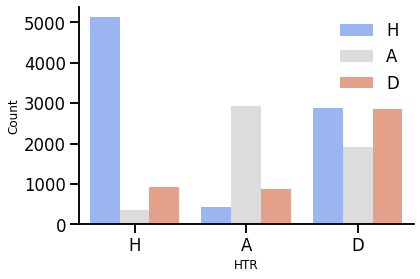

In [37]:
sns.countplot(data=df_for_anan,x="HTR",hue="FTR",palette="coolwarm")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")


**Understanding:**


H : Shows the Home team leading at Half Time.

A : Shows the Away team leading at Half Time.

D : Shows the game was level at Half Time.

Blue Bar shows the team went on to Win.

Orange Bar shows the team went on and Drew the game.

Green Bar shows the team Lost the game at Full time.

**Observation:**


1. The team Leading at Half Time almost always goes on to win the game at Full time.

2. If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.

3. So HTR is a very important variable to determine who wins at Full time.

**Conclusion**:

1. There is a Higher percentage of Home team winning, so clearly the team playing at Home has an advantage.
2. Goals Scored at Full time (FTHG - *Home Goals*, FTAG - *Away Goals*) determine FTR - *Full Time Result* i.e. which team will go on to win the game, team which score more Goals at FT wins the match.
3. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.
4. HTR (*Half Time Result*) is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.

#**Data Prepartion - Train and Test Dataset**

In [38]:
for col in data.columns:
  if data[col].dtypes == 'int64' :#'object': #'int64':
    data[col] = data[col].astype('float64')

**Identify the catergorical and non-categorical features**

In [39]:
one_hot_encode_cols = data.dtypes[data.dtypes == object]
one_hot_encode_cols

FTR    object
HTR    object
dtype: object

In [40]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T

0  1  2  3  4
FTR  H  H  A  A  A
HTR  H  H  A  A  A

Encode the target column - **FTR - Full Time Result** 

In [41]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()

data['FTR'] = target_labelencoder.fit_transform(data['FTR'])

Encode the categorical feature with OneHot Encoding and standarized the numerical features using MinMax Scaler.

In [42]:
data =  data.replace(np.nan, 0)

In [43]:
categorical_features = ["HTR"]
X = data[categorical_features]

colum_transformer = ColumnTransformer([('categorical', OneHotEncoder(), categorical_features),], remainder='passthrough')

data['HTR'] = colum_transformer.fit_transform(X)

In [44]:
X = data.drop(['FTR'], axis=1)
y = data['FTR']

In [45]:
y

0        2
1        2
2        0
3        0
4        0
        ..
18255    1
18256    1
18257    0
18258    0
18259    1
Name: FTR, Length: 18260, dtype: int64

In [46]:
data

FTHG  FTAG  FTR  HTHG  HTAG  HTR  HST  AST    HF    AF  ...   GBA  \
0       2.0   1.0    2   1.0   0.0  0.0  6.0  4.0  11.0   8.0  ...  0.00   
1       2.0   0.0    2   1.0   0.0  0.0  4.0  1.0  11.0   9.0  ...  0.00   
2       0.0   2.0    0   0.0   1.0  1.0  6.0  9.0   9.0  11.0  ...  0.00   
3       0.0   3.0    0   0.0   2.0  1.0  1.0  4.0   9.0   8.0  ...  0.00   
4       1.0   2.0    0   1.0   2.0  1.0  2.0  5.0  11.0  12.0  ...  0.00   
...     ...   ...  ...   ...   ...  ...  ...  ...   ...   ...  ...   ...   
18255   1.0   1.0    1   1.0   0.0  0.0  6.0  4.0  14.0  20.0  ...  3.20   
18256   1.0   1.0    1   1.0   0.0  0.0  1.0  5.0  18.0  22.0  ...  3.20   
18257   1.0   3.0    0   0.0   1.0  1.0  1.0  5.0  18.0  18.0  ...  2.80   
18258   1.0   2.0    0   0.0   1.0  1.0  8.0  7.0  15.0   5.0  ...  1.67   
18259   0.0   0.0    1   0.0   0.0  0.0  3.0  1.0  24.0  18.0  ...  4.00   

        BSH  BSD   BSA   SBH  SBD   SBA       TSR       HHR       AHR  
0      0.00  0.0  0.00  0.00  0.0  0.00  0.380952  0.250000  0.076923  
1      0.00  0.0  0.00  0.00  0.0  0.00  0.545455  0.166667  0.000000  
2      0.00  0.0  0.00  0.00  0.0  0.00  0.600000  0.000000  0.200000  
3      0.00  0.0  0.00  0.00  0.0  0.00  0.315789  0.000000  0.230769  
4      0.00  0.0  0.00  0.00  0.0  0.00  0.500000  0.066667  0.133333  
...     ...  ...   ...   ...  ...   ...       ...       ...       ...  
18255  2.15  3.1  3.30  2.20  3.0  3.20  0.575758  0.052632  0.071429  
18256  2.25  3.1  3.10  2.10  3.1  3.30  0.263158  0.200000  0.071429  
18257  2.50  3.1  2.70  2.30  3.1  2.88  0.409091  0.111111  0.230769  
18258  5.50  3.5  1.62  4.75  3.5  1.65  0.588235  0.050000  0.142857  
18259  2.00  3.3  3.50  1.90  3.2  3.80  0.678571  0.000000  0.000000  

[18260 rows x 73 columns]

# Feature Selection using SHAP technique

In [47]:
!pip install shap

In [48]:
import shap
from shap import TreeExplainer
from shap import summary_plot

In [49]:
#Split the  dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)
print(f'Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}, Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}')


Shape of X_train: (13695, 72), Shape of y_train: (13695,), Shape of X_test: (4565, 72), Shape of y_test: (4565,)


Use one of the classifier - Random Forest CLassifier  to fit to against full dataset and run SHAP

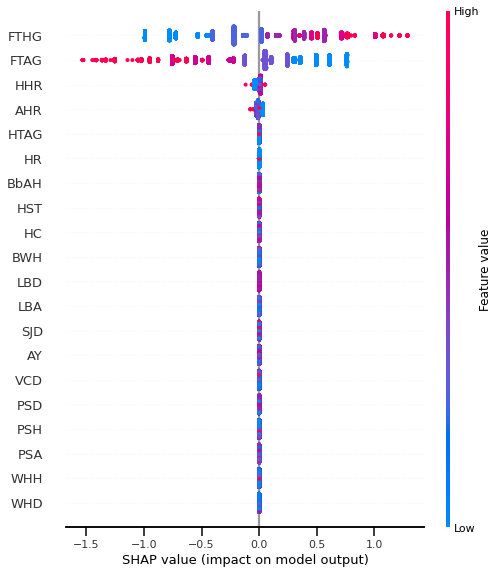

In [225]:
shap.summary_plot(shap_values)

[06:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


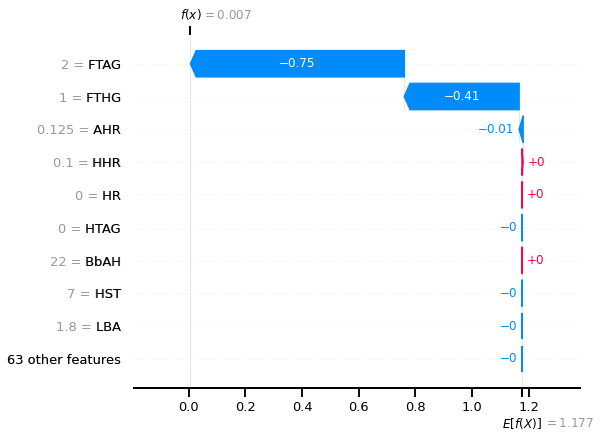

In [50]:
# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

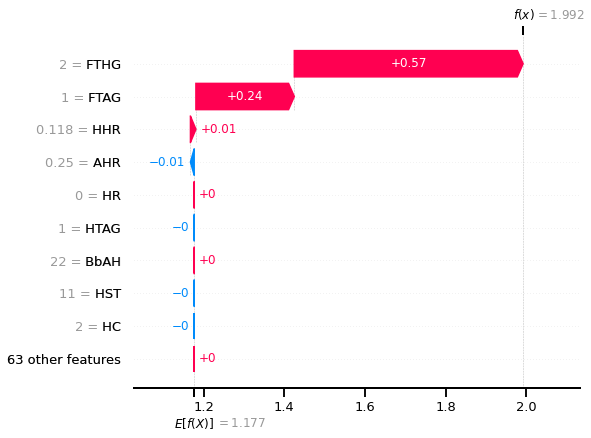

In [51]:
shap.plots.waterfall(shap_values[1])

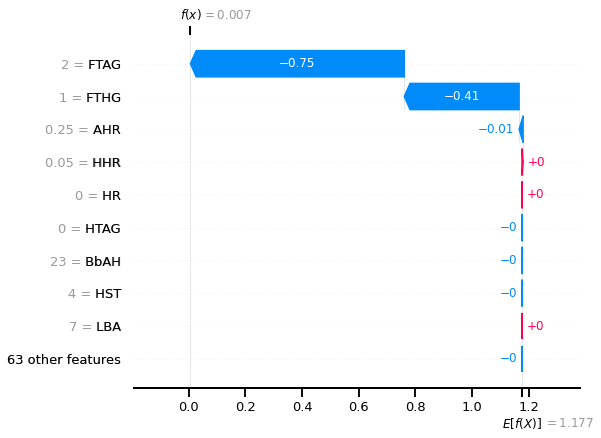

In [52]:
shap.plots.waterfall(shap_values[2])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

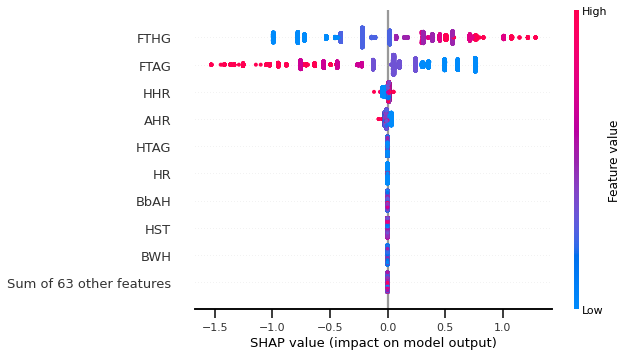

In [53]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

 The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

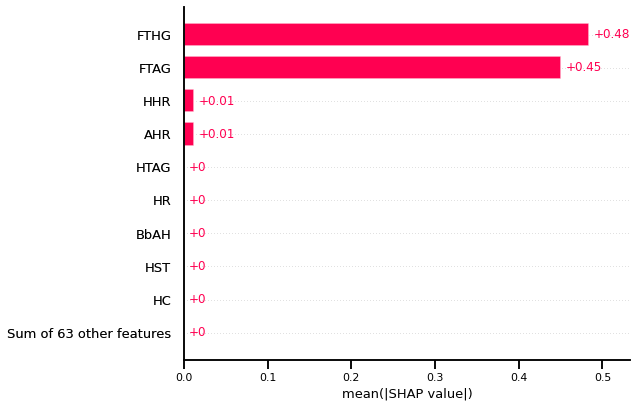

In [54]:
shap.plots.bar(shap_values)

*From the above SHAP diagram it can be concluded that features -  [["FTHG","FTAG","HTHG","HTAG","HTR","HHR",AHR,TSR"]] are the better features for performing classification task.*


In [55]:
data = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR","TSR", "HHR","AHR"]]
X = data.drop(['FTR'], axis=1)
y = data['FTR']

In [56]:
X.shape

(18260, 8)

In [57]:
y.shape

(18260,)

Split the dataset into training and test dataset.

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# **Regression**

Implement **Muller Loop** to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost" and display their accuracy.

In [59]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100)]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.93, Training time = 6.92 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 75.28, Training time = 0.02 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 88.88, Training time = 1.27 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.94, Training time = 0.49 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 100.00, Training time = 0.92 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 90.94, Training time = 3.09 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LogisticRegression, Score (test, accuracy) = 100.00


In [60]:
clf_df = pd.DataFrame(list(zip(clf_list,score_list)),columns=['classifier','score'])


Text(0, 0.5, 'score')

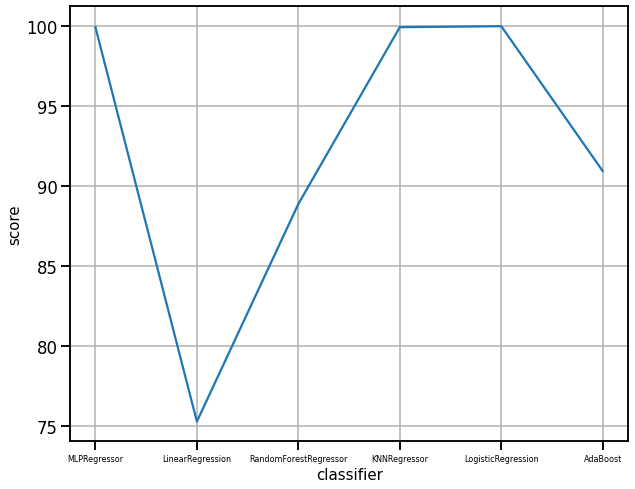

In [61]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")


# **Classification - Single Model - Decision Tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [62]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()

decisionTree = decisionTree.fit(X,y)

[Text(0.36363636363636365, 0.9444444444444444, 'X[0] <= 1.5\ngini = 0.642\nsamples = 18260\nvalue = [5204, 4628, 8428]'),
 Text(0.22727272727272727, 0.8333333333333334, 'X[1] <= 1.5\ngini = 0.627\nsamples = 10011\nvalue = [4651, 3516, 1844]'),
 Text(0.18181818181818182, 0.7222222222222222, 'X[7] <= 0.015\ngini = 0.606\nsamples = 6645\nvalue = [1285, 3516, 1844]'),
 Text(0.09090909090909091, 0.6111111111111112, 'X[0] <= 0.5\ngini = 0.491\nsamples = 3253\nvalue = [0, 1409, 1844]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 1409\nvalue = [0, 1409, 0]'),
 Text(0.13636363636363635, 0.5, 'gini = 0.0\nsamples = 1844\nvalue = [0, 0, 1844]'),
 Text(0.2727272727272727, 0.6111111111111112, 'X[0] <= 0.5\ngini = 0.471\nsamples = 3392\nvalue = [1285, 2107, 0]'),
 Text(0.22727272727272727, 0.5, 'gini = 0.0\nsamples = 1285\nvalue = [1285, 0, 0]'),
 Text(0.3181818181818182, 0.5, 'gini = 0.0\nsamples = 2107\nvalue = [0, 2107, 0]'),
 Text(0.2727272727272727, 0.7222222222222222, 'gini = 0.0\

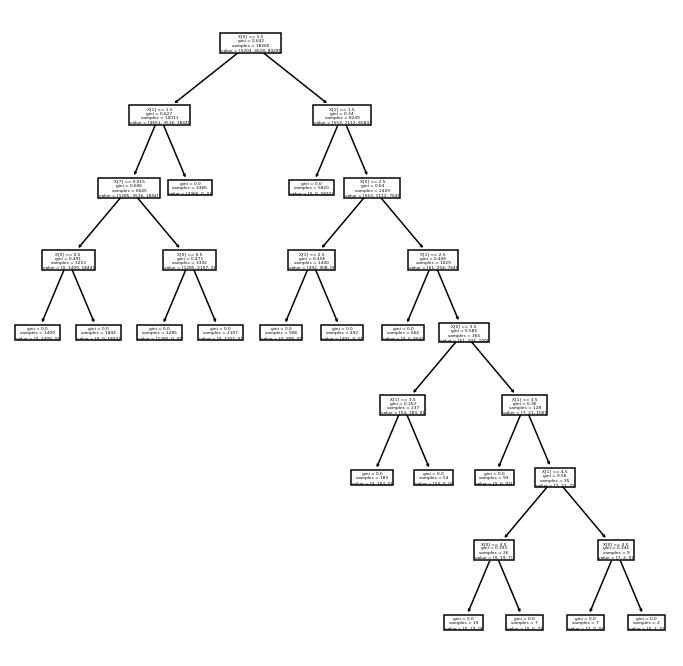

In [63]:
plt.figure(figsize=(12,12))
tree.plot_tree(decisionTree)

In [64]:
import graphviz 
dot_data = tree.export_graphviz(decisionTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Football")

'Football.pdf'

In [65]:
feature_names = X.columns.values.tolist()
feature_names 

['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'TSR', 'HHR', 'AHR']

In [66]:
target_names = 'FTR'

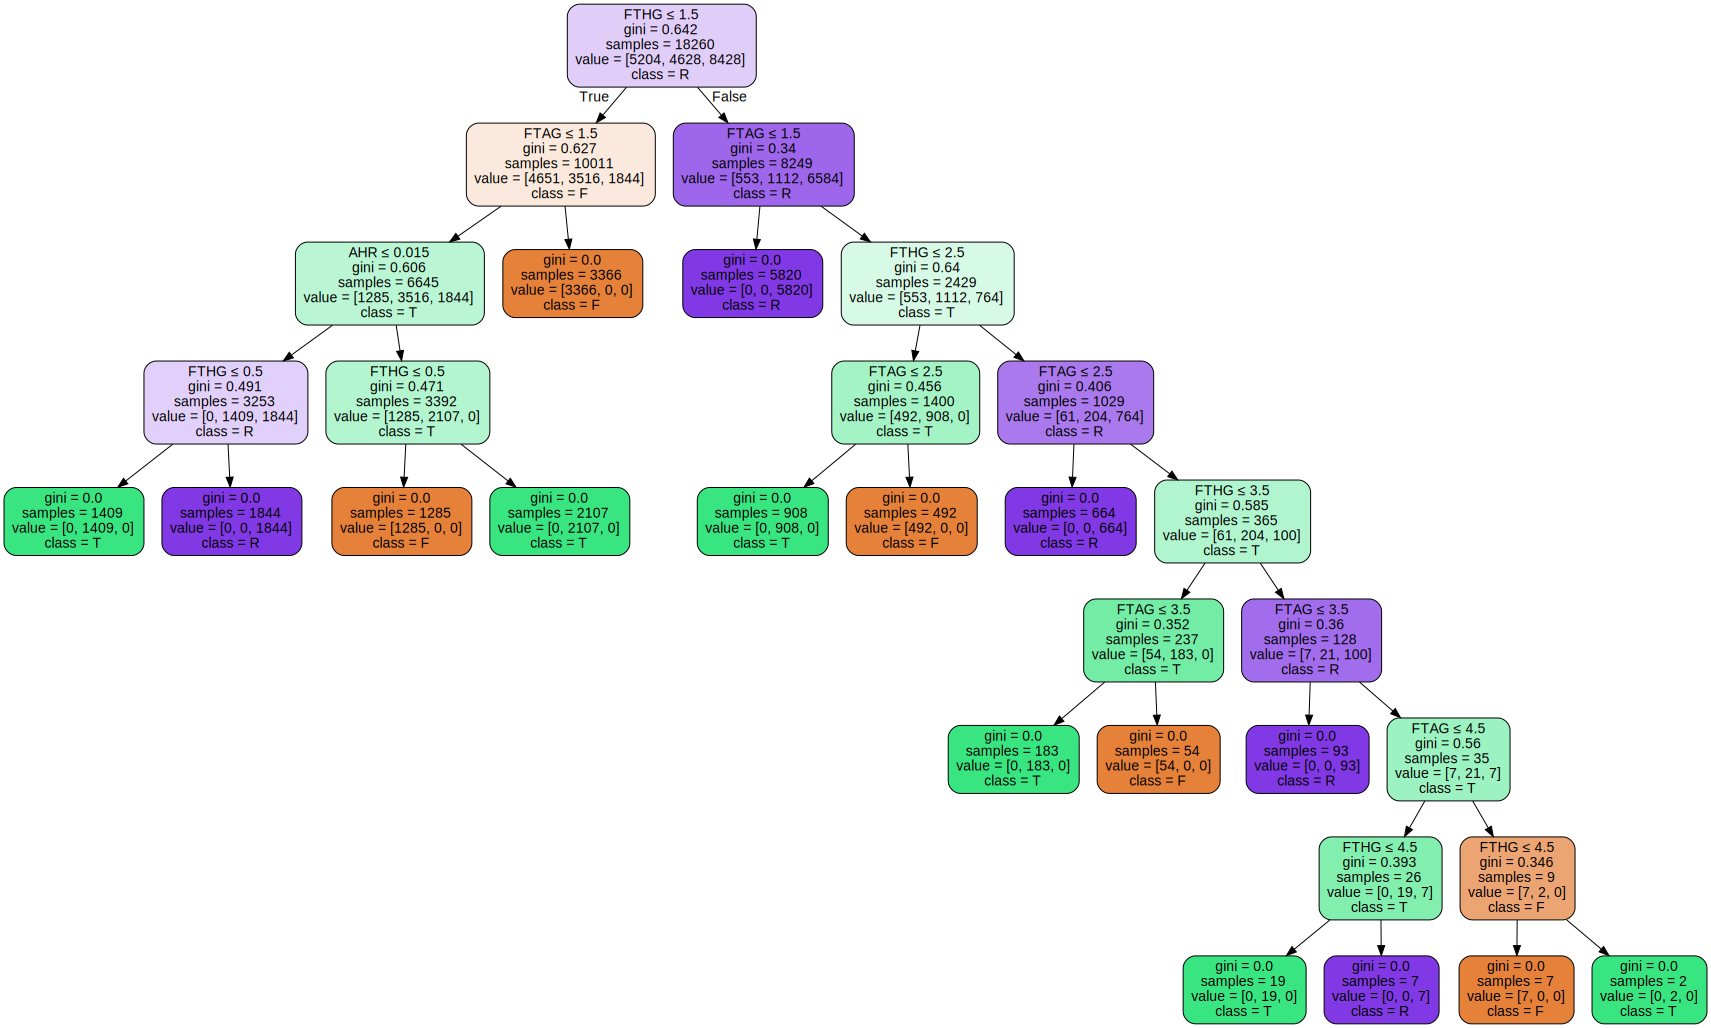

In [67]:
dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Classification**

Implement Muller Loop to run the training dataset against - "KNN Classifier", "NaiveBayes Classifier", "RandomForest Classifier", "XGB Classifier", "DecisionTreeClassifier" and display their accuracy.

In [68]:
#from sklearn.utils.validation import check_is_fitted

names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
           "Random Forest", "Neural Net", "AdaBoost","XG Boost",
           "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Classification  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classification Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms


Classification  Classifier = Nearest Neighbors, Score (test, accuracy) = 99.95, Training time = 0.87 seconds
Classification  Classifier = Linear SVM, Score (test, accuracy) = 100.00, Training time = 4.49 seconds
Classification  Classifier = Decision Tree, Score (test, accuracy) = 99.62, Training time = 0.02 seconds
Classification  Classifier = Random Forest, Score (test, accuracy) = 97.02, Training time = 0.13 seconds


X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

Classification  Classifier = Neural Net, Score (test, accuracy) = 100.00, Training time = 3.26 seconds
Classification  Classifier = AdaBoost, Score (test, accuracy) = 71.85, Training time = 1.11 seconds
Classification  Classifier = XG Boost, Score (test, accuracy) = 99.90, Training time = 2.40 seconds
Classification  Classifier = Naive Bayes, Score (test, accuracy) = 79.96, Training time = 0.02 seconds
--------------------------------------------------------------------------------
Best --> Classification Classifier = Linear SVM, Score (test, accuracy) = 100.00


Text(0, 0.5, 'score')

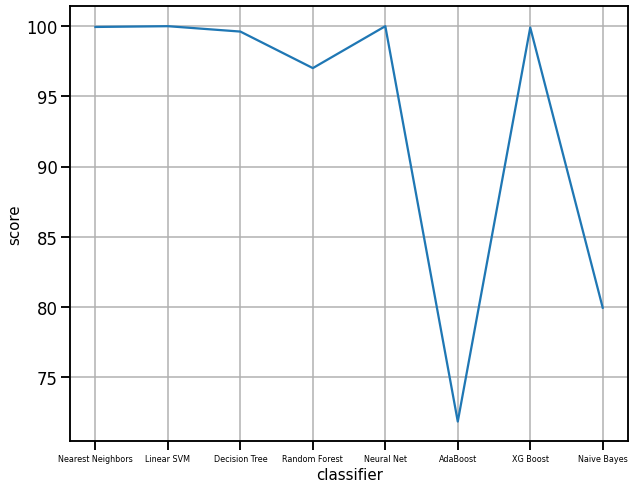

In [69]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")

In [70]:
list(zip(names, classifiers))

[('Nearest Neighbors', KNeighborsClassifier(n_neighbors=2)),
 ('Linear SVM', SVC(C=0.025, kernel='linear', probability=True)),
 ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
 ('Random Forest',
  RandomForestClassifier(max_depth=5, max_features=2, n_estimators=10)),
 ('Neural Net',
  MLPClassifier(early_stopping=True, learning_rate='adaptive', max_iter=1000)),
 ('AdaBoost', AdaBoostClassifier()),
 ('XG Boost', XGBClassifier(objective='multi:softprob')),
 ('Naive Bayes', GaussianNB())]

In [72]:
# Import interactive holoviews
import holoviews as hv
from holoviews import opts
import panel as pn
import os

In [73]:
def plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifer, df):
  fig, ax = plt.subplots(ncols=2, figsize=(8,5))
  
  # plotting    
  ax[0].plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  ax[0].plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  ax[0].plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  #ax[0].title('Multiclass ROC curve')
  #ax[0].xlabel('False Positive Rate')
  #ax[0].ylabel('True Positive rate')
  ax[0].legend(loc='best')
 
 # plot the roc/auc
#  ax[0].plot(fpr, tpr, label='AUC: %0.2f' % logit_roc_auc)
#  ax[0].plot([0, 1], [0, 1],'r--')
#  ax[0].set_xlim([0.0, 1.0])
#  ax[0].set_ylim([0.0, 1.05])
#  ax[0].set_xlabel('False Positive Rate')
#  ax[0].set_ylabel('True Positive Rate')
#  ax[0].title.set_text(type(classifer).__name__)
#  ax[0].legend(loc="lower right")

  # plot the confusion matrix
  plot_confusion_matrix(classifer, 
                          X_test, 
                          y_test, 
                          ax=ax[1], 
                          cmap='Blues',
                          display_labels=np.unique(y_test))
  ax[1].title.set_text(type(classifer).__name__)
  plt.tight_layout()  

In [74]:
def show_classification_results(metrics, df):
  # print accuracy results
  #columns=['Classifier', 'Score', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'Training Time'
  metrics.sort_values(by='Accuracy', ascending=False, inplace=True)
  pd.pandas.set_option('display.max_columns', None)
  pd.set_option('display.expand_frame_repr', False)
  print(metrics[['Classifier', 'Accuracy', 'ROC_AUC']])
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(metrics.iloc[0]['Classifier'], metrics.iloc[0]['Accuracy']))

  # plot the roc/auc 
  #columns=['name', 'y_pred', 'y_test', 'X_test', 'accu_score', 'fpr', 'tpr', 'logit_roc_auc', 'clf']
  for i, r in metrics.iterrows():
    name   = r['Classifier']
    y_pred = r['y_pred']
    y_test = r['y_test']
    X_test = r['X_test']
    accu_score = r['Accuracy']
    fpr = r['fpr']
    tpr = r['tpr']
    logit_roc_auc = r['ROC_AUC']
    classifier = r['model']
    
    # Plot the confusion matrix
    plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifier, df)

In [75]:
def train_evaluate_classifiers(X, y):
    # list of classifiers to compare
    names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
           "Random Forest", 
           "Neural Net", "AdaBoost",
           "Naive Bayes"]

    classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

    # init
    accu_results = []
    predictions = []
    results = []
    
    max_score = 0.0
    max_class = ''


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
    #y_test = np.argmax(y_test, axis=0)
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)

        # find the best classifier
        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

        # add classifier predictions and metric to predictions and results
        y_pred = clf.predict(X_test)
        
        y_pred_score = clf.predict_proba(X_test)
        accu_score = 100.0 * accuracy_score(y_test, y_pred)

        logit_roc_auc = roc_auc_score(y_test, y_pred_score,multi_class='ovo', average='weighted')
       # fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

        # accumulate various scores
        f1 = 100.0 * f1_score(y_test, y_pred,average='weighted')
        precision = 100.0 * precision_score(y_test, y_pred,average='weighted')
        recall = 100.0 * recall_score(y_test, y_pred,average='weighted')

        # roc curve for classes
        fpr = {}
        tpr = {}
        thresh ={}

        n_class = 3

        for i in range(n_class):    
          fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_score[:,i], pos_label=i)
        
        # capture predictions, results in df
        predictions.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, clf]) 
        accu_results.append([name, score, logit_roc_auc, f1, precision, recall, (time.time() - start_time)])
        results.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, f1, precision, recall, clf])
        
    results = pd.DataFrame(results, columns=['Classifier', 'y_pred', 'y_test', 'X_test', 'Accuracy', 'fpr', 'tpr', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'model'])
    return results

In [76]:
# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, data)

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
4         Neural Net   99.958927  0.999999
0  Nearest Neighbors   99.945235  0.999791
2      Decision Tree   99.616648  0.999937
3      Random Forest   98.630887  0.999378
6        Naive Bayes   79.956188  0.920523
5           AdaBoost   71.851041  0.958532
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

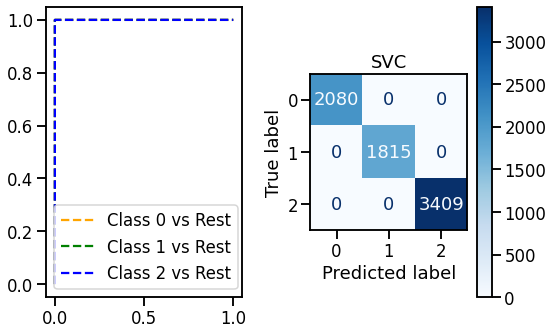

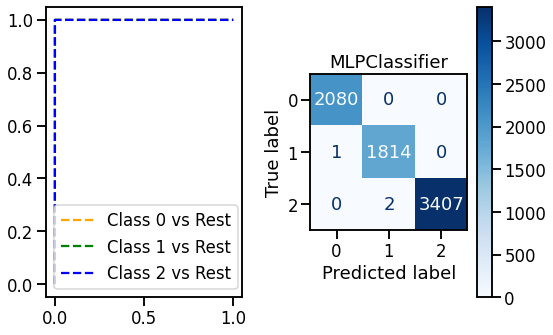

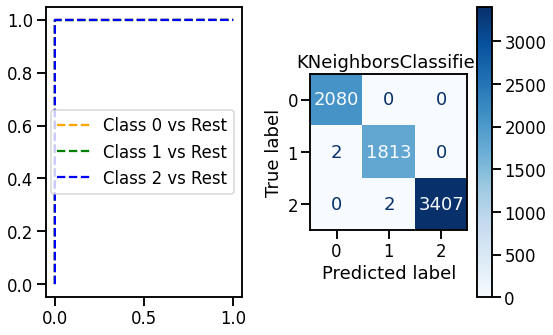

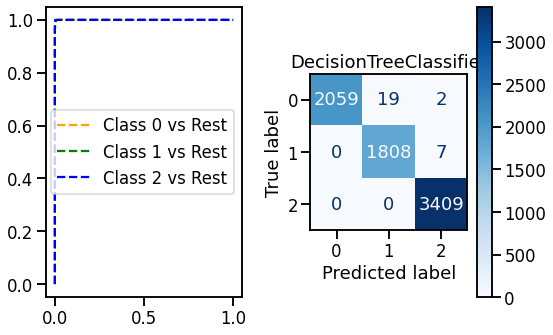

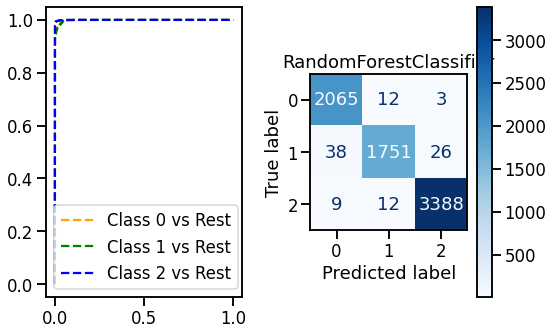

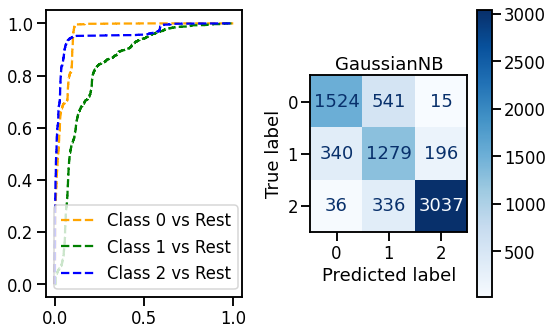

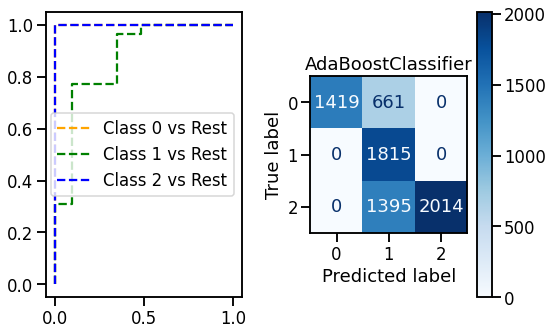

In [79]:
from imblearn.over_sampling import SMOTE


def add_smote(df, threshold1, threshold2 , threshold3):
  original_data = df #data[['FTHG','FTAG']]
  feature = original_data.columns.values.tolist()
  sm = SMOTE(sampling_strategy={0: threshold1, 1:threshold2, 2: threshold3})
  X_sample, y_sample = sm.fit_resample(original_data,data['FTR'])
  #Creating a new Oversampling Data Frame
  modified_data = pd.DataFrame(X_sample, columns = feature)
  modified_data['FTR'] = y_sample
  return modified_data
  
def plot_modified(original_data,modified_data):

  print("Orignal shape:", original_data.shape)
  print("Modified shape:",modified_data.shape)

  sns.set_context('talk', font_scale = 1)
  sns.countplot(data=original_data,x=data['FTR'],palette="coolwarm",)
  plt.xlabel("FTR",size=15,color="Black")
  plt.ylabel("Count",size=15,color="Black")
  plt.legend()
  plt.show()

  #sns.kdeplot(modified_data['FTHG'], label='Modified')
  sns.countplot(data=modified_data,x=modified_data['FTR'],palette="coolwarm",)
  plt.xlabel("FTR",size=15,color="Black")
  plt.ylabel("Count",size=15,color="Black")
  plt.legend()
  plt.show()

  sns.kdeplot(original_data['FTHG'], label='Original')
  sns.kdeplot(modified_data['FTHG'], label='Modified')
  plt.legend()
  plt.show()

After over-sampling, the number of samples (9000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (9000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (9000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
No handles with labels found to put in legend.


Orignal shape: (18260, 1)
Modified shape: (27000, 2)


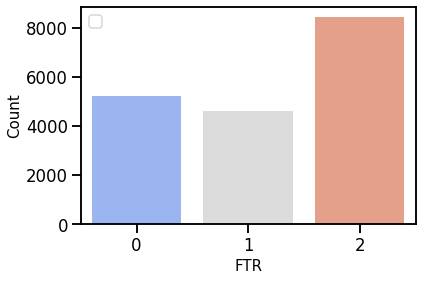

No handles with labels found to put in legend.


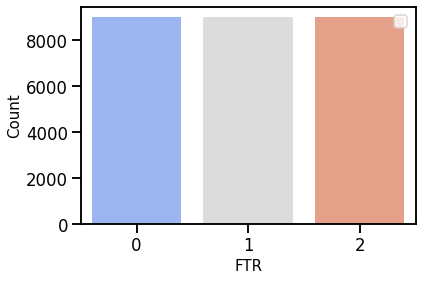

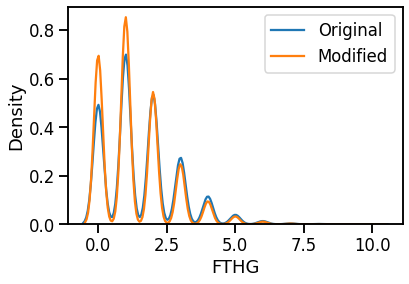

In [80]:
df  = data[['FTHG']]
modified_data = add_smote(df,9000,9000,9000)
plot_modified(df, modified_data)

## When the threshold of rarity is high (high upsampling)

After over-sampling, the number of samples (14000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (14000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (14000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
No handles with labels found to put in legend.


Orignal shape: (18260, 1)
Modified shape: (42000, 2)


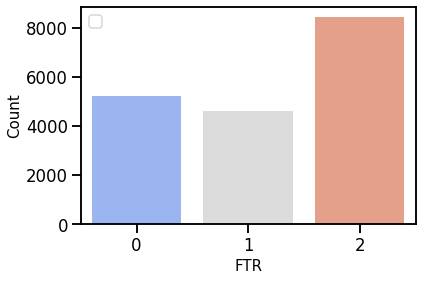

No handles with labels found to put in legend.


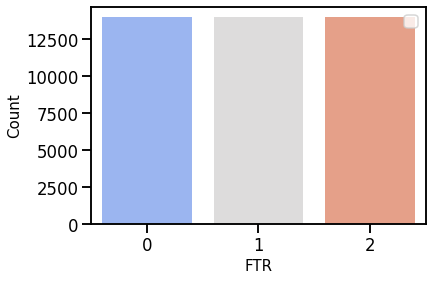

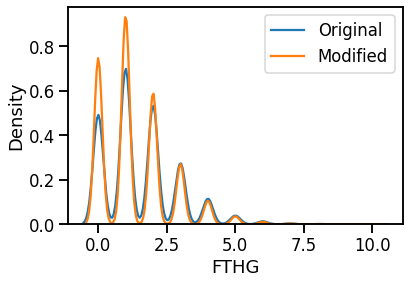

In [125]:
df  = data[['FTHG']]
modified_data = add_smote(df,14000,14000,14000)
plot_modified(df, modified_data)

After over-sampling, the number of samples (14000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (14000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (14000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
No handles with labels found to put in legend.


Orignal shape: (18260, 9)
Modified shape: (42000, 9)


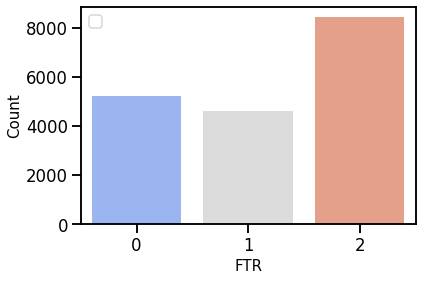

No handles with labels found to put in legend.


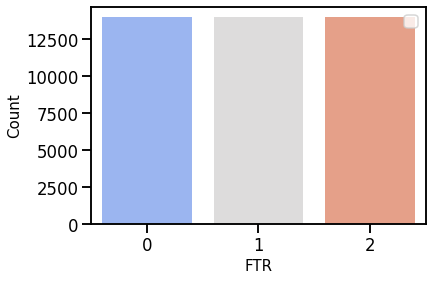

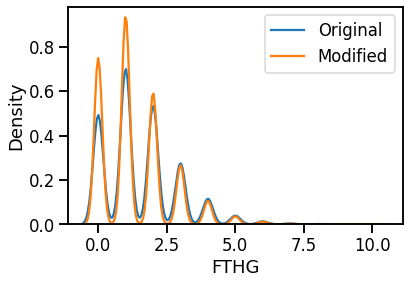

In [126]:
df  = data
modified_df = add_smote(df,14000,14000,14000)
plot_modified(df, modified_df)

In [127]:
modified_df

FTHG  FTAG  FTR  HTHG  HTAG  HTR       TSR       HHR       AHR
0       2.0   1.0    2   1.0   0.0  0.0  0.380952  0.250000  0.076923
1       2.0   0.0    2   1.0   0.0  0.0  0.545455  0.166667  0.000000
2       0.0   2.0    0   0.0   1.0  1.0  0.600000  0.000000  0.200000
3       0.0   3.0    0   0.0   2.0  1.0  0.315789  0.000000  0.230769
4       1.0   2.0    0   1.0   2.0  1.0  0.500000  0.066667  0.133333
...     ...   ...  ...   ...   ...  ...       ...       ...       ...
41995   4.0   0.0    2   2.0   0.0  0.0  0.800314  0.249516  0.000000
41996   1.0   0.0    2   1.0   0.0  0.0  0.631579  0.083333  0.000000
41997   2.0   1.0    2   1.0   0.0  0.0  0.404178  0.200000  0.067860
41998   2.0   0.0    2   2.0   0.0  0.0  0.550843  0.091379  0.000000
41999   3.0   0.0    2   1.0   0.0  0.0  0.773757  0.146218  0.000000

[42000 rows x 9 columns]

In [129]:
X = modified_df.drop(['FTR'], axis=1)
y = modified_df['FTR']

Training for one round of upsampling.

Train in a muller loop for classification.

Store the f1 score for the top algorithms.

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
4         Neural Net   99.988095  1.000000
0  Nearest Neighbors   99.952381  1.000000
2      Decision Tree   99.404762  0.999894
3      Random Forest   98.857143  0.999245
6        Naive Bayes   76.404762  0.920419
5           AdaBoost   70.250000  0.919854
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

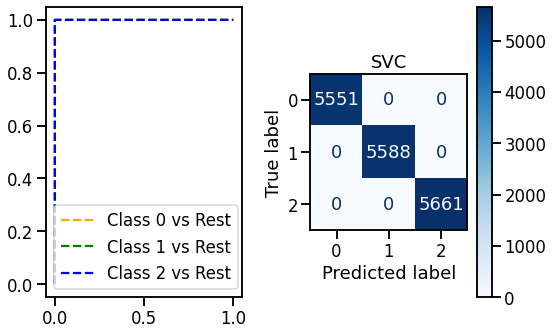

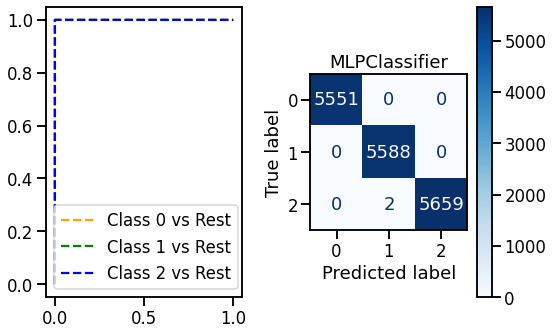

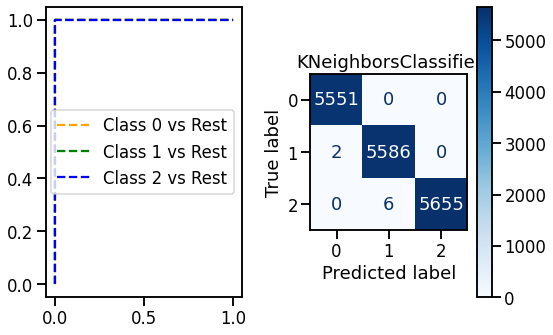

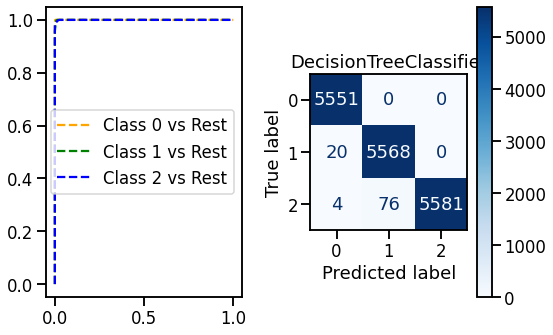

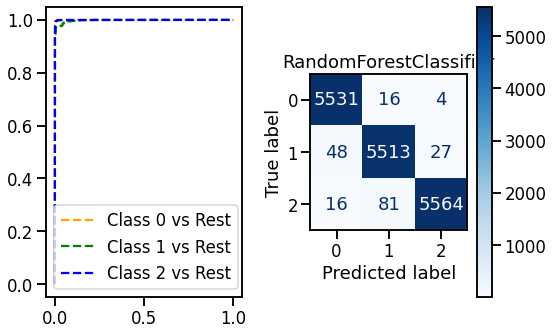

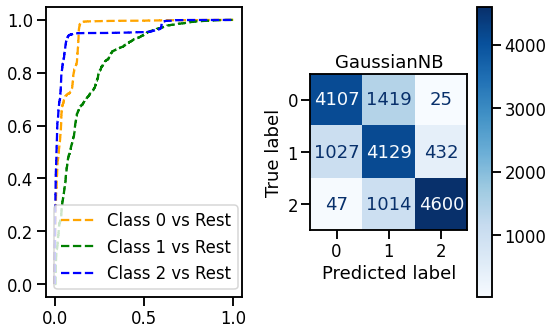

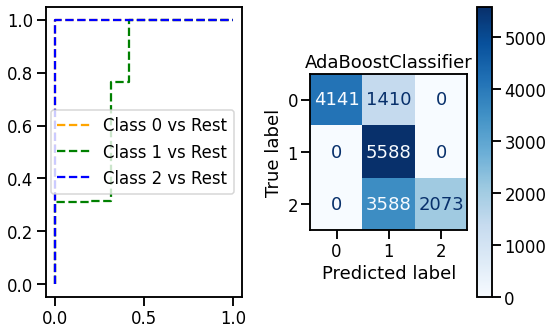

In [130]:
# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, modified_df)

Change the data distribution. Re-train the model.

Print confusion matrix, plot specificity vs sensitivity.

Repeat for each feature (1-3)

After over-sampling, the number of samples (30000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (30000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (14000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
No handles with labels found to put in legend.


Orignal shape: (18260, 9)
Modified shape: (74000, 9)


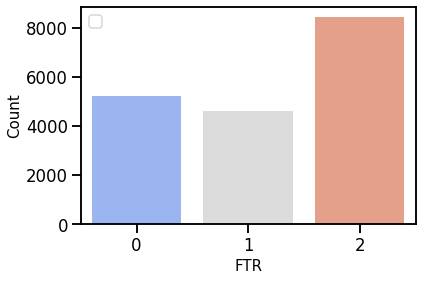

No handles with labels found to put in legend.


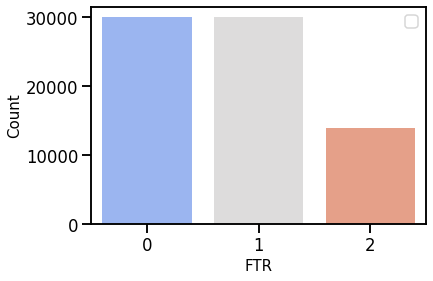

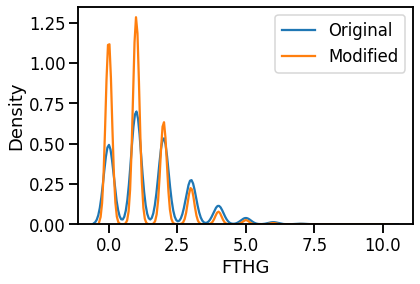

In [131]:
df  = data
modified_df = add_smote(df,30000,30000,14000)
plot_modified(df, modified_df)

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
4         Neural Net   99.996622  1.000000
0  Nearest Neighbors   99.989865  1.000000
2      Decision Tree   99.655405  0.999927
3      Random Forest   97.922297  0.999061
5           AdaBoost   75.462838  0.945923
6        Naive Bayes   73.229730  0.919745
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

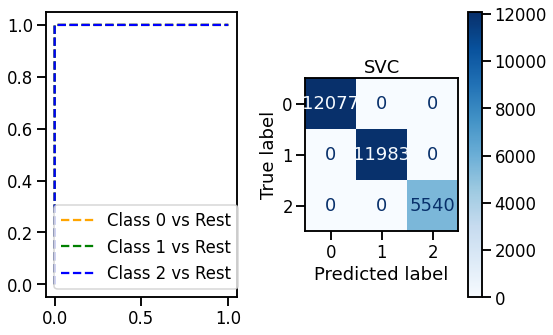

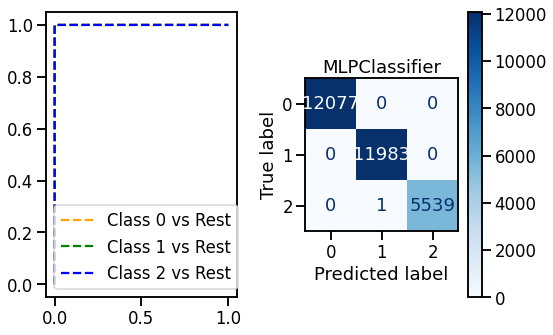

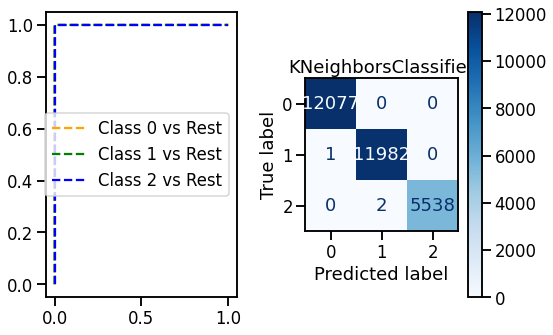

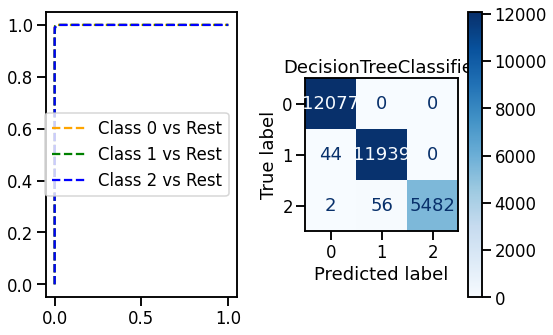

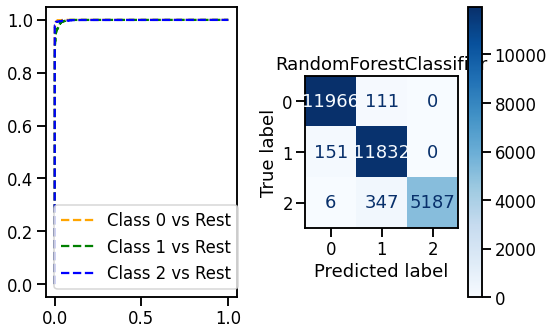

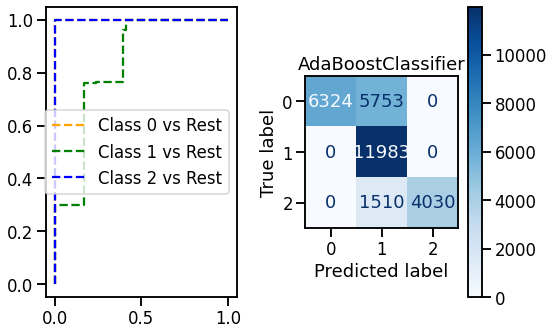

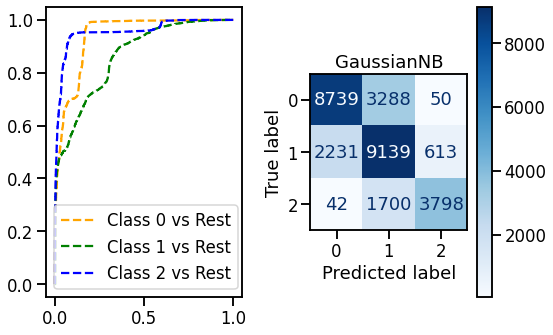

In [132]:
X = modified_df.drop(['FTR'], axis=1)
y = modified_df['FTR']

# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, modified_df)

## When the threshold of rarity is low (Low upsampling ~ Downsampling)

Since we are using SMOTE we are not downsampling the data.

In [82]:
#modified_data8000 = add_smote(df,8000,8000,8000)
modified_data9000 = add_smote(data,9000,9000,9000)
modified_data10000 = add_smote(data,10000,10000,10000)
modified_data11000 = add_smote(data,11000,11000,11000)
modified_data12000 = add_smote(data,12000,12000,12000)
modified_data13000 = add_smote(data,13000,13000,13000)
modified_data14000 = add_smote(data,14000,14000,14000)
modified_data15000 = add_smote(data,15000,15000,15000)

After over-sampling, the number of samples (9000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (9000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (9000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (10000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (10000) in class 1 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (10000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 8428)
After over-sampling, the number of samples (11000) in class 0 will be larger than the number of samples in the majority class (class 

In [83]:
modified_data9000['Threshold'] = 9000
modified_data10000['Threshold'] = 10000
modified_data11000['Threshold'] = 12000
modified_data12000['Threshold'] = 12000
modified_data13000['Threshold'] = 13000
modified_data14000['Threshold'] = 14000
modified_data15000['Threshold'] = 15000
final = [modified_data9000,modified_data10000,modified_data11000,modified_data12000,modified_data13000,modified_data14000,modified_data14000]
final_ds = pd.concat(final,ignore_index=True)
final_ds.head(10)
final_ds.to_csv('sampleddata.csv')


In [85]:
!pip install holoviews

In [86]:
pip install datashader


     |████████████████████████████████| 15.8 MB 4.6 MB/s 
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 837 kB 30.0 MB/s 
     |████████████████████████████████| 134 kB 43.2 MB/s 
     |████████████████████████████████| 830 kB 12.4 MB/s 
     |████████████████████████████████| 822 kB 42.7 MB/s 
     |████████████████████████████████| 802 kB 45.1 MB/s 
     |████████████████████████████████| 802 kB 42.1 MB/s 
     |████████████████████████████████| 793 kB 41.9 MB/s 
     |████████████████████████████████| 793 kB 30.8 MB/s 
     |████████████████████████████████| 791 kB 41.1 MB/s 
     |████████████████████████████████| 786 kB 43.2 MB/s 
     |████████████████████████████████| 779 kB 43.4 MB/s 
     |████████████████████████████████| 778 kB 42.0 MB/s 
     |████████████████████████████████| 776 kB 41.3 MB/s 
     |████████████████████████████████| 769 kB 43.3 MB/s 
     |████████████████████████████████| 766 kB 43.4 MB/s 
     |██████████

In [87]:
!pip install jupyter_bokeh

     |████████████████████████████████| 1.4 MB 4.9 MB/s 
     |████████████████████████████████| 18.5 MB 1.4 MB/s 
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.


In [ ]:
def plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifer, df):
  fig, ax = plt.subplots(ncols=2, figsize=(8,5))
  
  # plotting    
  ax[0].plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  ax[0].plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  ax[0].plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  #ax[0].title('Multiclass ROC curve')
  #ax[0].xlabel('False Positive Rate')
  #ax[0].ylabel('True Positive rate')
  ax[0].legend(loc='best')
 
 # plot the roc/auc
#  ax[0].plot(fpr, tpr, label='AUC: %0.2f' % logit_roc_auc)
#  ax[0].plot([0, 1], [0, 1],'r--')
#  ax[0].set_xlim([0.0, 1.0])
#  ax[0].set_ylim([0.0, 1.05])
#  ax[0].set_xlabel('False Positive Rate')
#  ax[0].set_ylabel('True Positive Rate')
#  ax[0].title.set_text(type(classifer).__name__)
#  ax[0].legend(loc="lower right")

  # plot the confusion matrix
  plot_confusion_matrix(classifer, 
                          X_test, 
                          y_test, 
                          ax=ax[1], 
                          cmap='Blues',
                          display_labels=np.unique(y_test))
  ax[1].title.set_text(type(classifer).__name__)
  plt.tight_layout()  
  

In [205]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['0','1','2'],columns=['0','1','2'])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
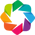

In [209]:
hv.extension('matplotlib', 'bokeh')
pn.extension()

def gen_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, index=['0','1','2'],columns=['0','1','2'])
 #   labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
 #   pos = [(0,1),(1,1),(0,0),(1,0)]
 #   hm_data = list(map(lambda tup, i: tup + (i,), pos, [tp, fn, fp, tn]))
 #   label_data = list(map(lambda tup, lab, i: tup + ('\n\n\n{}'.format(lab),), pos, labels, [tp, fn, fp, tn]))
    hm = hv.HeatMap(cm_df). \
        opts(cmap="Blues",
             colorbar=False,
             xaxis='bare',
             yaxis='bare',
             fig_size=400
            )

    return hm #* hv.Labels(label_data)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
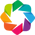

In [90]:
hv.extension('matplotlib', 'bokeh')
pn.extension()

def gen_roc_curve(fpr_tpr, name, auc, accuracy):
    return hv.Curve(fpr_tpr) \
             .opts(xlim=(-0.01,1),
                   ylim=(0,1.05),
                   xlabel='False Positive',
                   ylabel='True Positive',
                   title='{} - AUC: {:.2}, Accuracy: {:.3}'.format(name, auc, accuracy))

In [91]:
pip install hvplot

     |████████████████████████████████| 10.7 MB 4.7 MB/s 
  Created wheel for bokeh: filename=bokeh-2.3.3-py3-none-any.whl size=11342785 sha256=ed34ae016e6a0d577e59ece9efdcfcbae43997b5c5feacadaf8001d5605fb19f
  Stored in directory: /root/.cache/pip/wheels/57/e3/79/051e58e8a3d9076de99bdd7d68d463289e28c18329933984ff
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-bokeh 3.0.4 requires bokeh>=2.4.0, but you have bokeh 2.3.3 which is incompatible.


In [211]:
all_sampled_datasets = final_ds
all_sampled_datasets

FTHG  FTAG  FTR  HTHG  HTAG  HTR       TSR       HHR       AHR  Threshold
0        2.0   1.0    2   1.0   0.0  0.0  0.380952  0.250000  0.076923       9000
1        2.0   0.0    2   1.0   0.0  0.0  0.545455  0.166667  0.000000       9000
2        0.0   2.0    0   0.0   1.0  1.0  0.600000  0.000000  0.200000       9000
3        0.0   3.0    0   0.0   2.0  1.0  0.315789  0.000000  0.230769       9000
4        1.0   2.0    0   1.0   2.0  1.0  0.500000  0.066667  0.133333       9000
...      ...   ...  ...   ...   ...  ...       ...       ...       ...        ...
248995   1.0   0.0    2   0.0   0.0  0.0  0.825499  0.052849  0.000000      14000
248996   2.0   1.0    2   1.0   0.0  0.0  0.733963  0.109994  0.151953      14000
248997   3.0   1.0    2   2.0   0.0  0.0  0.645335  0.121703  0.073735      14000
248998   3.0   0.0    2   2.0   0.0  0.0  0.695652  0.187500  0.000000      14000
248999   2.0   1.0    2   1.0   0.0  0.0  0.732479  0.104361  0.142857      14000

[249000 rows x 10 columns]

In [ ]:
df_smogn = all_sampled_datasets[all_sampled_datasets['Threshold'] == 9000]
X = df_smogn.drop(['FTR', 'Threshold'], axis=1)
y = df_smogn['FTR']

metrics = train_evaluate_classifiers(X, y)

In [ ]:
metrics

In [210]:
for i, r in metrics.iterrows():
        name   = r['Classifier']
        y_pred = r['y_pred']
        y_test = r['y_test']
        accu_score = r['Accuracy']
        fpr = r['fpr']
        tpr = r['tpr']
        print("Y value",y_pred)
        print("LLLLL",y_test)
        fpr_tpr = np.squeeze(np.dstack((fpr,tpr)))
        logit_roc_auc = r['ROC_AUC']
        auc_roc_curve = gen_roc_curve(fpr_tpr, name, logit_roc_auc, accu_score)
        conf_mat = gen_cm(y_test, y_pred)
        print("Iteration Done")


Y value [2 0 2 ... 0 2 2]
LLLLL 5312     2
18357    0
6428     2
15414    0
10610    1
        ..
13561    0
25759    1
648      0
15365    2
17964    2
Name: FTR, Length: 10800, dtype: int64
Iteration Done
Y value [2 0 2 ... 0 2 2]
LLLLL 5312     2
18357    0
6428     2
15414    0
10610    1
        ..
13561    0
25759    1
648      0
15365    2
17964    2
Name: FTR, Length: 10800, dtype: int64
Iteration Done
Y value [2 0 2 ... 0 2 2]
LLLLL 5312     2
18357    0
6428     2
15414    0
10610    1
        ..
13561    0
25759    1
648      0
15365    2
17964    2
Name: FTR, Length: 10800, dtype: int64
Iteration Done
Y value [2 0 2 ... 0 2 2]
LLLLL 5312     2
18357    0
6428     2
15414    0
10610    1
        ..
13561    0
25759    1
648      0
15365    2
17964    2
Name: FTR, Length: 10800, dtype: int64
Iteration Done
Y value [2 0 2 ... 0 2 2]
LLLLL 5312     2
18357    0
6428     2
15414    0
10610    1
        ..
13561    0
25759    1
648      0
15365    2
17964    2
Name: FTR, Length: 

In [ ]:
hv.extension('matplotlib', 'bokeh')
pn.extension()

def render_layout(thres):
    layout = []

    # Add in slider threshold 
    df_smogn = all_sampled_datasets[all_sampled_datasets['Threshold'] == int(thres)]
    X = df_smogn.drop(['FTR', 'Threshold'], axis=1)
    y = df_smogn['FTR']
    print(int(thres))

    metrics = train_evaluate_classifiers(X, y)
    for i, r in metrics.iterrows():
        name   = r['Classifier']
        y_pred = r['y_pred']
        y_test = r['y_test']
        accu_score = r['Accuracy']
        fpr = r['fpr']
        tpr = r['tpr']
        fpr_tpr = np.squeeze(np.dstack((fpr,tpr)))
        logit_roc_auc = r['ROC_AUC']

        # for the AUC, we need only plot our FP vs TP
        auc_roc_curve = gen_roc_curve(fpr_tpr, name, logit_roc_auc, accu_score)
        conf_mat = gen_cm(y_test, y_pred)
        qq = conf_mat + auc_roc_curve
        layout.append(qq)
        
    return hv.Layout(layout).cols(2)

viz = hv.DynamicMap(render_layout, kdims='thres')
viz.redim.range(thres=(9000,10000)) # To avoid crashing, range is adjusted so it limits the option of redistribution

# IMPORTANT NOTE: the slider is very sensitive since it needs to reconfigure dataset every time the threshold changes
# When threshold is change, progress bar of SMOGN is shown underneath the diagram 
# (Make sure to check for loading before changing the slider again)